In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#%matplotlib 


# PARTE 1

In [2]:
def create_gauss_filter(h,w,k_size,sigma):
  # kernel gaussiano
  kernel_x = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
  kernel_y = kernel_x.T
  kernel = kernel_x * kernel_y

  filtro_gaussiano = np.zeros((h,w))
  centro_x = int(w/2)
  centro_y = int(h/2)

  for i in range(k_size):
    for j in range(k_size):
      filtro_gaussiano[centro_y - int(k_size/2) + i][centro_x - int(k_size/2) + j] = kernel[i][j]
  
  #transformada de fourier
  transformada = np.fft.fft2(filtro_gaussiano)

  return filtro_gaussiano , transformada

In [3]:
def vis_tf(transformada):
  return 20*np.log(np.abs(np.fft.fftshift(transformada)))

In [4]:
filtro1 , transf1 = create_gauss_filter(281,141, 7, 1.5)
filtro2, transf2 = create_gauss_filter(50, 51, 5, 0.5)
filtro3, transf3 = create_gauss_filter(77,77,9,1)

In [8]:
transf1 = vis_tf(transf1)
transf2 = vis_tf(transf2)
transf3 = vis_tf(transf3)

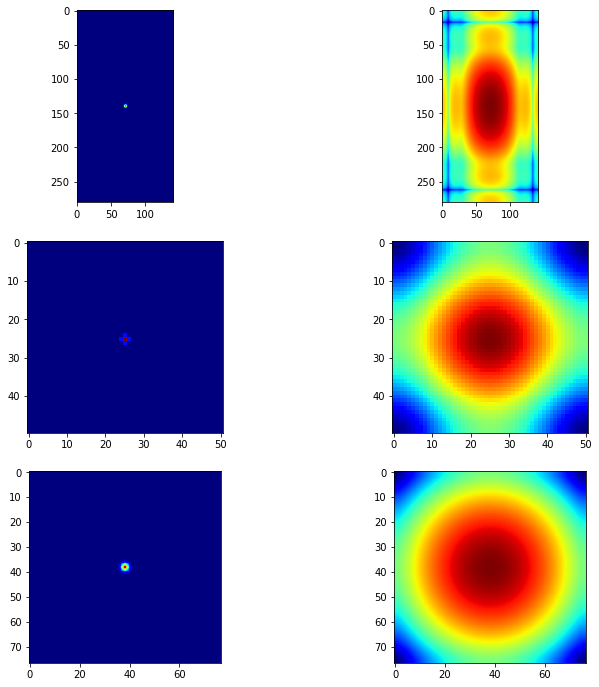

In [9]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.imshow(filtro1, cmap='jet')
plt.subplot(3,2,2)
plt.imshow(transf1, cmap='jet')

plt.subplot(3,2,3)
plt.imshow(filtro2, cmap='jet')
plt.subplot(3,2,4)
plt.imshow(transf2, cmap='jet')

plt.subplot(3,2,5)
plt.imshow(filtro3, cmap='jet')
plt.subplot(3,2,6)
plt.imshow(transf3, cmap='jet')

In [ ]:
chewy = cv.imread('chewbacca.jpg',cv.IMREAD_GRAYSCALE)

In [4]:
depr = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)

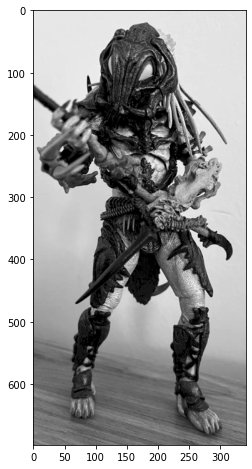

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(depr, cmap='gray')

In [10]:
dep_h , dep_w = depr.shape

In [5]:
def aplicar_filtro(img, transf_filtro):
  return np.fft.ifftshift(np.real(np.fft.ifft2(np.fft.fft2(img) * transf_filtro)))


In [51]:
filtro_dep_1 , transf_dep_1 = create_gauss_filter(dep_h,dep_w,k_size= 3, sigma= 1.5 )
filtro_dep_2 , transf_dep_2 = create_gauss_filter(dep_h,dep_w,k_size= 7, sigma= 1.5 )
filtro_dep_3 , transf_dep_3 = create_gauss_filter(dep_h,dep_w,k_size= 11, sigma= 2 )
filtro_dep_4 , transf_dep_4 = create_gauss_filter(dep_h,dep_w,k_size= 25, sigma= 3 )



Text(0.5, 1.0, 'Imagen original')

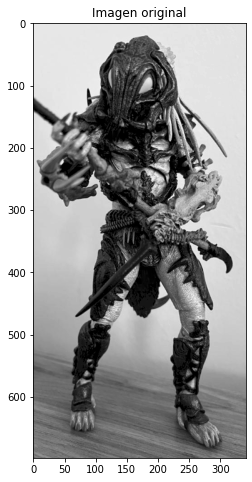

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(depr, cmap='gray')
plt.title('Imagen original')

Text(0.5, 1.0, 'Blur gaussiano 1')

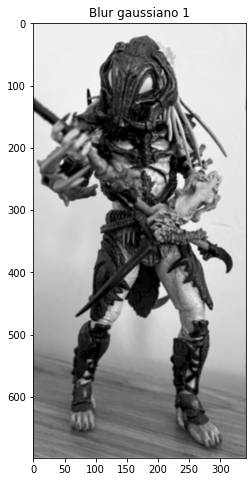

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(aplicar_filtro(depr, transf_dep_1), cmap='gray')
plt.title('Blur gaussiano 1')

Text(0.5, 1.0, 'Blur gaussiano 2')

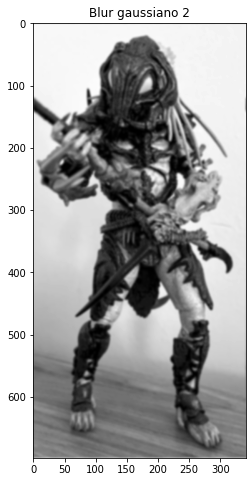

In [36]:
plt.figure(figsize=(8,8))
plt.imshow(aplicar_filtro(depr, transf_dep_2), cmap='gray')
plt.title('Blur gaussiano 2')

Text(0.5, 1.0, 'Blur gaussiano 3')

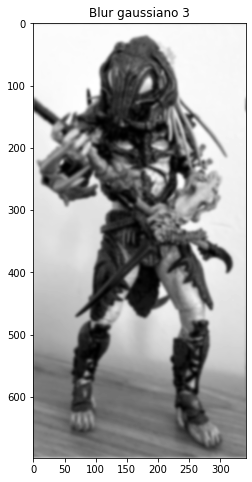

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(aplicar_filtro(depr, transf_dep_3), cmap='gray')
plt.title('Blur gaussiano 3')

Text(0.5, 1.0, 'Blur gaussiano 4')

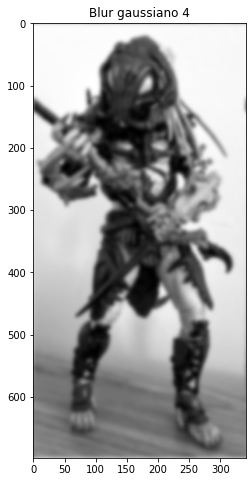

In [52]:
plt.figure(figsize=(8,8))
plt.imshow(aplicar_filtro(depr, transf_dep_4), cmap='gray')
plt.title('Blur gaussiano 4')

# PARTE 2

In [6]:
def im_measure (image):
  #transformada de fourier
  f = np.fft.fft2(image)
  #centrado
  fc = np.fft.fftshift(f)
  #modulo
  af = np.abs(fc)
  #máxima frecuencia
  m = np.max(f)
  # pixels > treshold
  th = np.count_nonzero( f >= (m/1000) )
  #image quality measure
  fm = th / (image.shape[0] * image.shape[1])

  return fm

In [54]:
# filtrado por convolución
img_conv = cv.GaussianBlur(depr, (31, 31) , 2)

In [56]:
#filtrado espectral
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 31, sigma= 2 )
img_espec = aplicar_filtro(depr, transf)

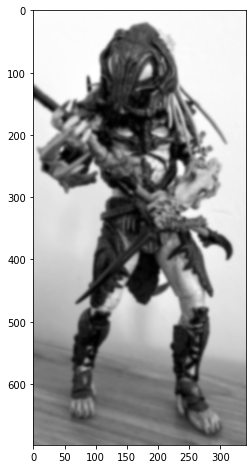

In [58]:
plt.figure(figsize=(8,8))
plt.imshow( img_conv, cmap='gray')

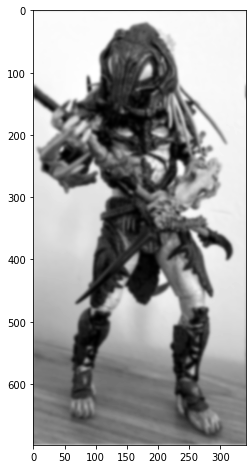

In [59]:
plt.figure(figsize=(8,8))
plt.imshow( img_espec, cmap='gray')

In [60]:
im_measure(img_conv)

0.005432362258316598

In [61]:
im_measure(img_espec)

0.005356737725718223

In [63]:
im_measure(img_conv)/im_measure(img_espec)

1.0141176470588236

In [64]:
img_conv = cv.GaussianBlur(depr, (11, 11) , 2)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 11, sigma= 2 )
img_espec = aplicar_filtro(depr, transf)
im_measure(img_conv)/im_measure(img_espec)


1.017014694508894

In [65]:
img_conv = cv.GaussianBlur(depr, (5, 5) , 1.5)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 5, sigma= 1.52 )
img_espec = aplicar_filtro(depr, transf)
im_measure(img_conv)/im_measure(img_espec)

1.004563605248146

Observamos que relación de la métrica con distintos valores de k_size y sigma varía (aunque muy poco), pero en todos los casos se puede considerar que la diferencia en el valor para el filtrado por convolución con el filtrado espectral es despreciable.

# PARTE 3

Métrica:

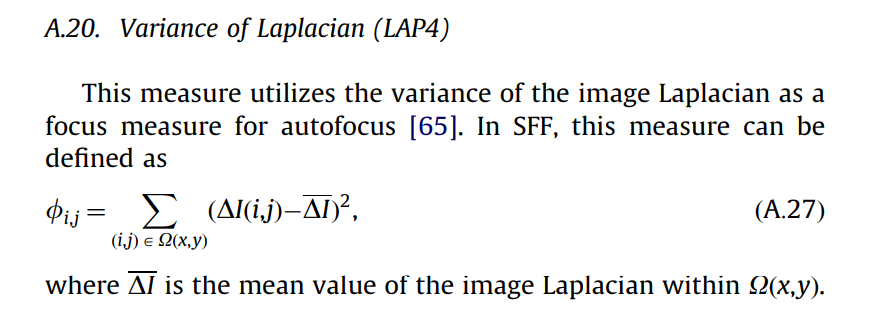

In [7]:
from IPython import display
display.Image("lapv.png")

In [8]:
def LAPV(img):
    """Implements the Variance of Laplacian (LAP4) focus measure
    operator. Measures the amount of edges present in the image.
    :param img: the image the measure is applied to
    :type img: numpy.ndarray
    :returns: numpy.float32 -- the degree of focus
    """
    return np.std(cv.Laplacian(img, cv.CV_64F)) ** 2


In [11]:
img_conv = cv.GaussianBlur(depr, (11, 11) , 2)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 11, sigma= 2 )
img_espec = aplicar_filtro(depr, transf)
LAPV(img_conv)/LAPV(img_espec)

0.7183352050892133

In [12]:
img_conv = cv.GaussianBlur(depr, (7, 7) , 2)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 7, sigma= 2 )
img_espec = aplicar_filtro(depr, transf)
LAPV(img_conv)/LAPV(img_espec)

0.7453294758516336

In [13]:
img_conv = cv.GaussianBlur(depr, (15, 15) , 2.5)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 15, sigma= 2.5 )
img_espec = aplicar_filtro(depr, transf)
LAPV(img_conv)/LAPV(img_espec)

0.6826216640708712

In [14]:
img_conv = cv.GaussianBlur(depr, (7, 7) , 0.8)
filtro , transf = create_gauss_filter(dep_h,dep_w,k_size= 7, sigma= 0.8 )
img_espec = aplicar_filtro(depr, transf)
LAPV(img_conv)/LAPV(img_espec)

0.9353896852109882

Utilizando la métrica de la varianza del laplaciano comparando casos de filtrado por convolución y filtrado espectral, dió mayor en el de filtrado espectral y la relacion entre las métricas para cada filtrado varía dependiendo del tamaño del kernel y el sigma utilizado. 